In [18]:
function nextGeneration(populationSize, proportion, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic.
    p0to1 is the transition probability from state 0 to state 1 in the mutation case
    p1to0 is the transition probability from state 1 to state 0 in the mutation case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    # Number of 1 in the old generation
    newProportion0 = floor(proportion*populationSize)
    
    # Mutations
    if(p0to1 > 0)
        for j in 1:floor(populationSize*(1-proportion))
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
            if rand() <= p0to1
                newProportion0 += 1
            end
        end    
    end

    if (p1to0 > 0)
        for j in 1:floor(populationSize*(proportion))
            if rand() <= p1to0
                newProportion0 -= 1
            end
        end
    end
    
    # Selection
    if (selectionFactor > 0)
        newProportion0 = min(newProportion0*(1+selectionFactor), populationSize)
    end
        
    newProportion = 0
    
    # Next Generation
    for i in 1:populationSize
        if rand() < (newProportion0/populationSize)
            newProportion += 1
        end
    end
    return (newProportion/populationSize)
end

nextGeneration (generic function with 4 methods)

In [17]:
function trajectory(populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Run the Wright-Fisher model algorithm.
    Returns the whole trajectory of proportions and the time of absorption (0 if no absorption)
    finalTime is how many generations you produce
    p0to1 and p1to0 are transition probabilities for the mutations case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    listOfProportions = Float64[]
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the trajectory
    push!(listOfProportions, currentProportion)

    for time in 2:finalTime
        
        currentProportion = nextGeneration(populationSize, currentProportion, p0to1, p1to0, selectionFactor)
        
        # Adding the proportion to the trajectory
        push!(listOfProportions, currentProportion)
    end
    
    # Returns the whole trajectory
    return listOfProportions
end  

trajectory (generic function with 4 methods)

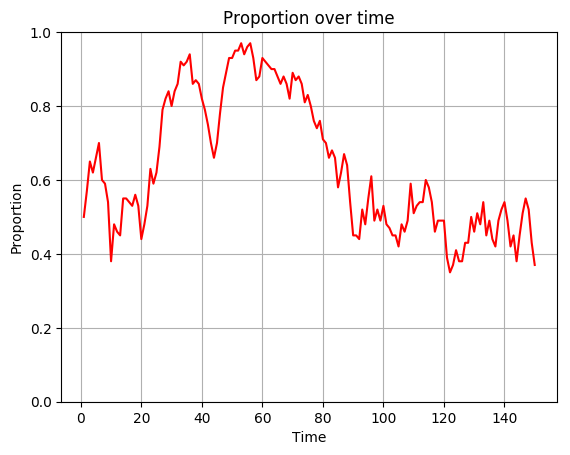

In [22]:
using PyPlot
    
populationSize = 100
initialProportion = 0.5
p0to1 = 0.02
p1to0 = 0.02
selectionFactor = 0.0001
finalTime = 150
traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)

ioff()  
listOfTimes = collect(1:length(traj))
title("Proportion over time")
xlabel("Time")
ylabel("Proportion")
ylim(0,1)
grid(true)
    
plot(listOfTimes, traj, color="red")
show()